In [1]:
#importing the required libraries & packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df2= pd.read_csv('C:/Users/DR/Desktop/SPT/Tweet.csv')





In [2]:
df=df2.iloc[:100]
df

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
95,550490701562003457,paulchertyk,1420082185,$tsla $scty Just gotta wait and be patient wit...,0,0,0
96,550491399788183553,Michael_Vasanth,1420082352,"RT CNBC: Earlier this month, a mysterious glit...",0,0,0
97,550493870069678080,caroltheva,1420082940,Option Greeks are critical in Options trading ...,0,0,0
98,550494346978398209,Pharmdca,1420083054,@JoeP450 betting big on $cytr $gild $baba $aap...,1,0,1


In [ ]:
#Below is relevant part

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:

df["row_id"] = df.index + 1
#print first 10 rows 
print (df.head(10))

             tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   
5  550443808606126081    aaplstocknews  1420071005   
6  550443809700851716       iknowfirst  1420071005   
7  550443857142611968      Cprediction  1420071016   
8  550443857595600896    iknowfirst_br  1420071017   
9  550443857692078081  Gold_prediction  1420071017   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...        

<ipython-input-4-f9f2fcc4edde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["row_id"] = df.index + 1


In [5]:
#create a new data frame with "id" and "comment" fields
df_subset = df[['tweet_id', 'body']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['body'] = df_subset['body'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['body'] = df_subset['body'].str.casefold()
print (df_subset.head(10))

             tweet_id                                               body
0  550441509175443456  lx   made          on  aapl  check it out  htt...
1  550441672312512512  insanity of today weirdo massive selling   aap...
2  550441732014223360  s p    #stocks performance  hd  low  sbux  tgt...
3  550442977802207232   gm  tsla  volkswagen pushes      record recal...
4  550443807834402816  swing trading  up to       return in    days h...
5  550443808606126081  swing trading  up to       return in    days h...
6  550443809700851716  swing trading  up to       return in    days h...
7  550443857142611968  swing trading  up to       return in    days h...
8  550443857595600896  swing trading  up to       return in    days h...
9  550443857692078081  swing trading  up to       return in    days h...


<ipython-input-5-cdb6f11821c3>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['body'] = df_subset['body'].str.replace("[^a-zA-Z#]", " ")


In [6]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['tweet_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [7]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['tweet_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with tweet_id = 99999999999
t_df_cleaned = t_df[t_df.tweet_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
             tweet_id sentiment_type  sentiment_score
0  550441509175443456       compound           0.8779
0  550441672312512512       compound          -0.8271
0  550441732014223360       compound          -0.2732
0  550442977802207232       compound           0.0000
0  550443807834402816       compound           0.5574
0  550443808606126081       compound           0.5574
0  550443809700851716       compound           0.5574
0  550443857142611968       compound           0.5574
0  550443857595600896       compound           0.5574
0  550443857692078081       compound           0.5574


In [8]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='tweet_id', how='inner')
print(df_output.head(10))

             tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   
5  550443808606126081    aaplstocknews  1420071005   
6  550443809700851716       iknowfirst  1420071005   
7  550443857142611968      Cprediction  1420071016   
8  550443857595600896    iknowfirst_br  1420071017   
9  550443857692078081  Gold_prediction  1420071017   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...        

In [9]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,100.000000
mean,0.113409
std,0.494997
min,-0.872000
25%,-0.273200
50%,0.127900
75%,0.557400
max,0.916900


<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='Period', ylabel='Mean Sentiment Score'>

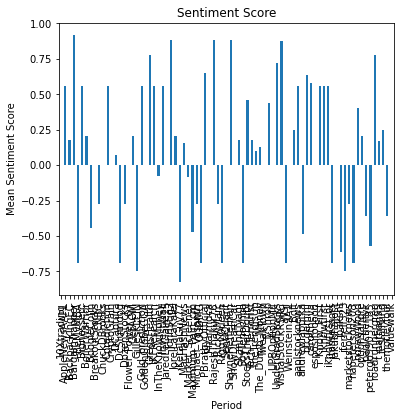

In [11]:
#generate mean of sentiment_score by period
dfg = df_output.groupby(['writer'])['sentiment_score'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Period', figsize=(6, 5))